In [383]:
#Data Analysis Phase
#Main Aim is to understnad more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

##Display all the columns in Data Frame

pd.pandas.set_option('display.max_columns',None)

In [4]:
dataset=pd.read_csv(r'C:\Users\Mizgaan\Downloads\Data_Sets\train_sample(1).csv')

print(dataset.shape)
dataset.head()


(6331, 4)


,vehicle_id,Curb_Weight,Price_USD,year
0,2,1729.0,33285.00000,2010
1,4,1305.0,24535.71429,2010
2,5,1305.0,26268.75000,2010
3,8,1725.0,35925.00000,2010
4,9,1574.0,26780.00000,2010


In [33]:
dataset.describe()

,vehicle_id,Curb_Weight,Price_USD,year
count,6331.000000,6331.000000,6331.000000,6331.000000
mean,10354.769547,1896.920588,43033.739666,2010.676828
std,6542.638421,534.732810,41798.498950,0.804292
min,2.000000,749.000000,9970.000000,2010.000000
25%,3207.500000,1504.841166,24510.000000,2010.000000
50%,11610.000000,1773.000000,32645.000000,2010.000000
75%,15740.500000,2173.240917,45227.500000,2011.000000
max,20083.000000,3674.000000,507500.000000,2012.000000


In [27]:
dataset.columns

Index(['vehicle_id', 'Curb_Weight', 'Price_USD', 'year'], dtype='object')

# Before Cleaning 

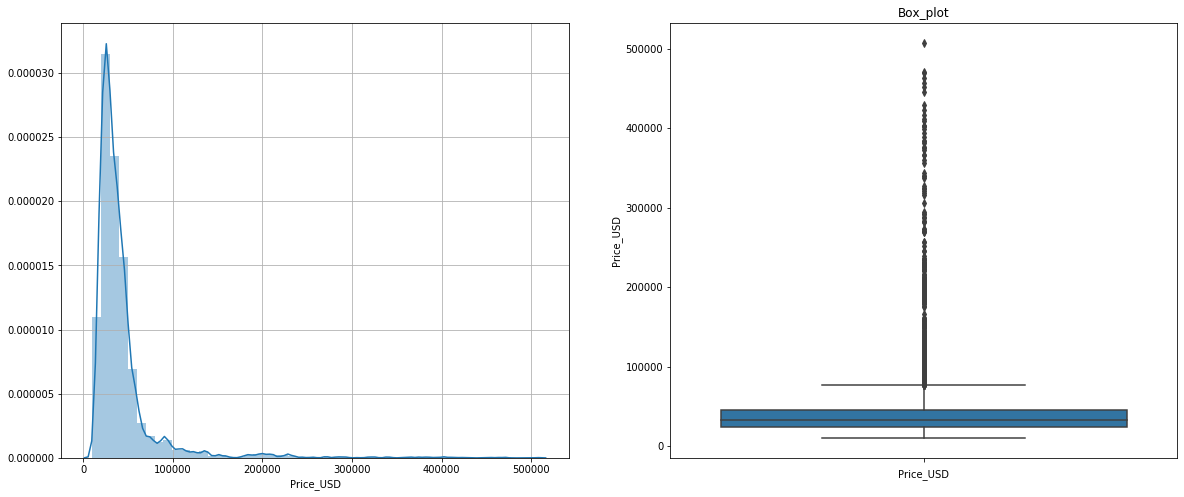

32645.0


In [393]:
 plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
plt.title("Box_plot")
plt.xlabel("Price_USD")
sns.boxplot(y=dataset.Price_USD)


plt.subplot(1,2,1)
sns.distplot(dataset.Price_USD)
plt.grid()
plt.show()
print(dataset['Price_USD'].median())

In [203]:
Q1 = dataset.Price_USD.quantile(0.2465)
Q3 = dataset.Price_USD.quantile(0.7465)
#Interquanatile Range
IQR = Q3 - Q1
print(Q3,'-',Q1,'= ',IQR,'(Interquantile Range)')


#Upper Whisker And Lower Whisker

lower_Whisker=Q1-(1.5*IQR)
upper_Whisker=Q3+(1.5*IQR) 
print("lower_Whisker={} ".format(lower_Whisker),'\n upper_Whisker= {}'.format(upper_Whisker))


45037.25969615 - 24457.3142249 =  20579.94547125 (Interquantile Range)
lower_Whisker=-6412.603981975  
 upper_Whisker= 75907.177903025


# we can plot each of these fearues

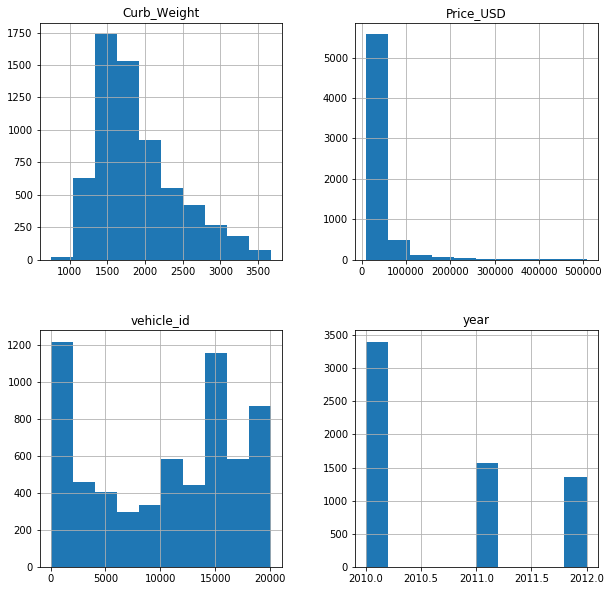

In [51]:
data=dataset[['vehicle_id', 'Curb_Weight', 'Price_USD', 'year']]
# sns.distplot(data)
data.hist(figsize=(10,10))
plt.show()

# Now, lets plot each of these features vs the Emission, to see how linear is their relation:

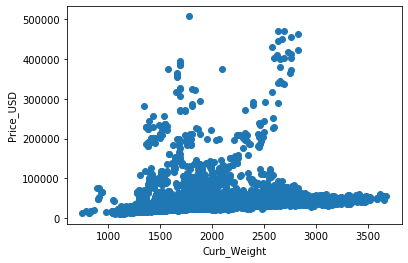

In [57]:
# TYPE-I

plt.scatter(dataset['Curb_Weight'],dataset['Price_USD'])
plt.xlabel('Curb_Weight')
plt.ylabel('Price_USD')
plt.show()

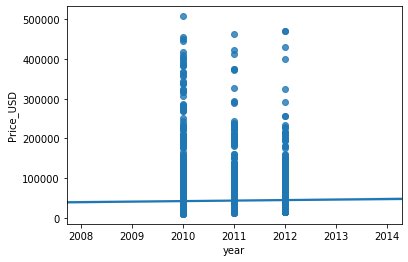

In [61]:
# plt.scatter(dataset['year'],dataset['Price_USD'])
# plt.show()

sns.regplot(x='year',y='Price_USD',data=dataset)

1773.0

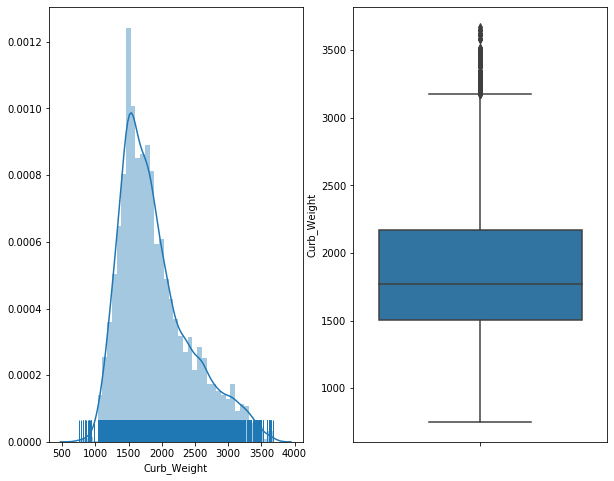

In [44]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.distplot(dataset["Curb_Weight"],hist=True,rug=True)

plt.subplot(1,2,2)
sns.boxplot(y=dataset.Curb_Weight)
dataset["Curb_Weight"].median()

In [77]:
Q1 = dataset.Curb_Weight.quantile(0.2465)
Q3 = dataset.Curb_Weight.quantile(0.7465)
#Interquanatile Range
IQR = Q3 - Q1
print(Q3,'-',Q1,'= ',IQR,'(Interquantile Range)')


#Upper Whisker And Lower Whisker

lower_Whisker=Q1-(1.5*IQR)
upper_Whisker=Q3+(1.5*IQR) 
print("lower_Whisker={} ".format(lower_Whisker),'\n upper_Whisker= {}'.format(upper_Whisker))

2160.0 - 1501.53468407 =  658.4653159300001 (Interquantile Range)
lower_Whisker=513.8367101749998  
 upper_Whisker= 3147.6979738950004


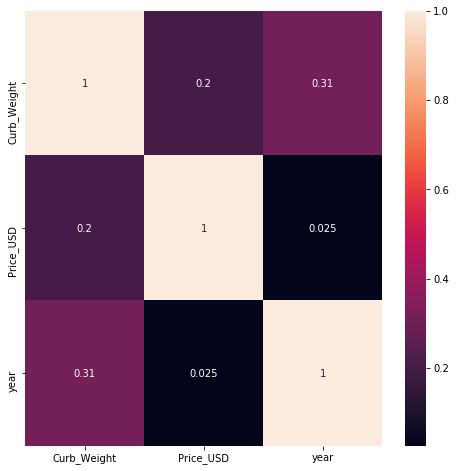

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(dataset.drop(['vehicle_id'],axis=1).corr(), annot=True)

In [20]:
print(dataset.Price_USD.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95]))
np.percentile(dataset["Price_USD"],95)

count      6331.000000
mean      43033.739666
std       41798.498950
min        9970.000000
25%       24510.000000
50%       32645.000000
75%       45227.500000
85%       54372.500000
90%       65220.000000
95%       99115.000000
max      507500.000000
Name: Price_USD, dtype: float64


99115.0

# Cleaning The Data

In [21]:
data=dataset.copy()
clean_data=data[data["Price_USD"] < np.percentile(data['Price_USD'],95)]

In [22]:
clean_data.describe()

,vehicle_id,Curb_Weight,Price_USD,year
count,6014.000000,6014.000000,6014.000000,6014.000000
mean,10323.303791,1895.375190,35413.097838,2010.676588
std,6573.004019,541.208682,15818.639106,0.805969
min,2.000000,749.000000,9970.000000,2010.000000
25%,3149.500000,1498.019477,24211.940787,2010.000000
50%,11574.500000,1768.160218,31697.500000,2010.000000
75%,15733.750000,2167.929723,42881.875000,2011.000000
max,20083.000000,3674.000000,99050.000000,2012.000000


In [220]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5463 entries, 0 to 6330
Data columns (total 4 columns):
vehicle_id     5463 non-null int64
Curb_Weight    5463 non-null float64
Price_USD      5463 non-null float64
year           5463 non-null int64
dtypes: float64(2), int64(2)
memory usage: 213.4 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021AE4BE4A90>,
      dtype=object)

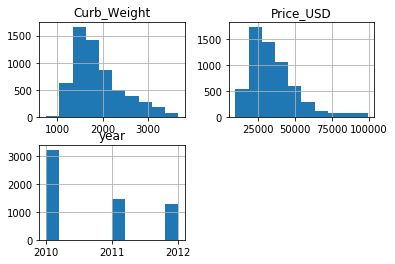

In [24]:
clean_data[['Curb_Weight', 'Price_USD', 'year']].hist()


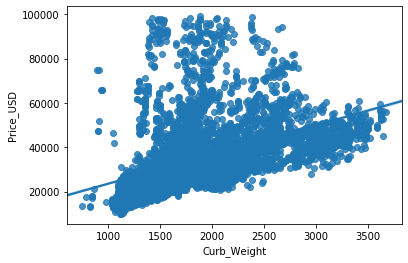

In [27]:
sns.regplot(x='Curb_Weight',y='Price_USD',data=clean_data)

31697.5

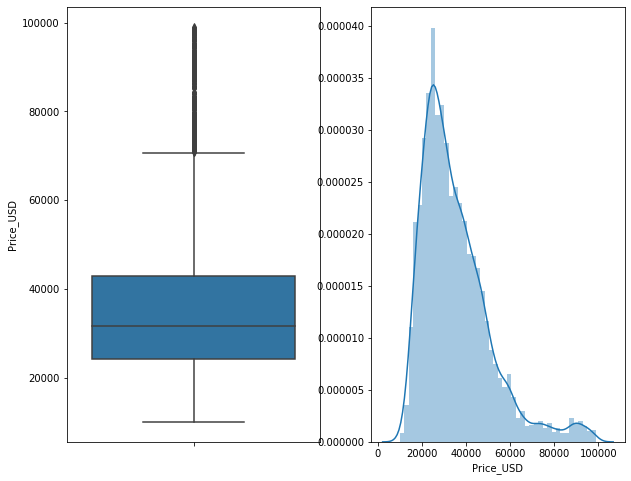

In [54]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.boxplot(y=clean_data.Price_USD)

plt.subplot(1,2,2)
sns.distplot(clean_data.Price_USD)
clean_data['Price_USD'].median()

1773.0

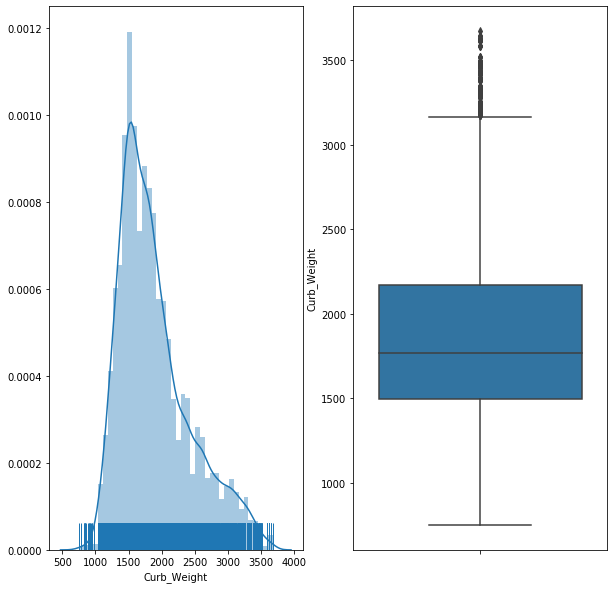

In [127]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.distplot(clean_data["Curb_Weight"],hist=True,rug=True)

plt.subplot(1,2,2)
sns.boxplot(y=clean_data.Curb_Weight)
dataset["Curb_Weight"].median()

In [205]:
# Q1 = clean_data.Curb_Weight.quantile(0.2465)
# Q3 = clean_data.Curb_Weight.quantile(0.7465)
# #Interquanatile Range
# IQR = Q3 - Q1
# print(Q3,'-',Q1,'= ',IQR,'(Interquantile Range)')


# #Upper Whisker And Lower Whisker

# lower_Whisker=Q1-(1.5*IQR)
# upper_Whisker=Q3+(1.5*IQR) 
# print("lower_Whisker={} ".format(lower_Whisker),'\n upper_Whisker= {}'.format(upper_Whisker))

# clean_data_outlir =clean_data.loc[(clean_data.Curb_Weight > lower_Whisker) & (clean_data.Curb_Weight < upper_Whisker) ]


In [212]:
# plt.figure(figsize=(10,8))
# plt.subplot(1,2,1)
# sns.boxplot(y=clean_data_outlir.Curb_Weight)

# plt.subplot(1,2,2)
# sns.distplot((clean_data_outlir.Curb_Weight))
# np.log(clean_data_outlir.Curb_Weight)

In [204]:
# data=dataset['vehicle_id', 'Curb_Weight', 'Price_USD', 'year']
# for columns in data:
#     sns.distplot(data[columns])

# sns.distplot(clean_data_outlir['Price_USD'])

# Detecting Outliers Using Z-Score

In [80]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(clean_data))
print(z)

[[1.5703873  0.30743968 0.13454222 0.83954095]
 [1.570083   1.09093645 0.68768798 0.83954095]
 [1.56993085 1.09093645 0.57812231 0.83954095]
 ...
 [1.4838736  1.49053758 1.29205814 1.64214952]
 [1.4841779  1.42955788 1.1479124  1.64214952]
 [1.48493865 0.19177927 1.34573347 1.64214952]]


In [ ]:
## if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [84]:
threshold = 3
print(np.where(z > 3))

(array([  58,   61,   72,   73,   77,   78,  156,  157,  158,  245,  309,
        333,  703,  713,  718,  719,  721,  875,  920,  921,  922,  923,
        924,  925,  926,  927,  930,  932,  955,  957, 1092, 1221, 1222,
       1404, 1411, 1421, 1738, 1739, 1744, 1745, 2071, 2077, 2078, 2079,
       2080, 2155, 2156, 2173, 2193, 2208, 2216, 2371, 2372, 2398, 2407,
       2409, 2410, 2412, 2523, 2540, 2544, 2552, 2559, 2590, 2600, 2634,
       2766, 2792, 2832, 2844, 2859, 2861, 2910, 2998, 3007, 3057, 3154,
       3161, 3163, 3185, 3192, 3240, 3274, 3324, 3334, 3335, 3360, 3403,
       3404, 3436, 3437, 3487, 3489, 3548, 3619, 3667, 3677, 3838, 3839,
       3840, 3843, 3849, 3852, 3853, 3865, 3877, 4178, 4219, 4446, 4499,
       4587, 4602, 4610, 4645, 4652, 4653, 4654, 4656, 4672, 4676, 4680,
       4758, 4786, 4914, 4969, 4984, 5049, 5052, 5053, 5131, 5167, 5194,
       5212, 5234, 5252, 5377, 5409, 5461, 5464, 5496, 5512, 5528, 5582,
       5591, 5602, 5608, 5645, 5651, 5676, 5680, 5

In [63]:
print(z[58][2])

3.413150195484883


In [206]:
# data=dataset['vehicle_id', 'Curb_Weight', 'Price_USD', 'year']
# for columns in data:
#     sns.distplot(data[columns])

# sns.distplot(dataset['Price_USD'])

# Removing Outliers

In [200]:
def remove_outlier(data_in, col_name):
    Q1 = data_in[col_name].quantile(0.2465)
    Q3 = data_in[col_name].quantile(0.7465)
    #Interquanatile Range
    IQR = Q3 - Q1
    print(Q3,'-',Q1,'= ',IQR,'(Interquantile Range)')
    
    #Upper Whisker And Lower Whisker

    lower_Whisker=Q1-(1.5*IQR)
    upper_Whisker=Q3+(1.5*IQR) 
    print("lower_Whisker={} ".format(lower_Whisker),'\n upper_Whisker= {}'.format(upper_Whisker))
   
    df_out = data_in.loc[(data_in[col_name] > lower_Whisker) & (data_in[col_name] <= upper_Whisker)]
    return df_out

42738.52250000001 - 24097.045 =  18641.477500000008 (Interquantile Range)
lower_Whisker=-3865.171250000014  
 upper_Whisker= 70700.73875000002


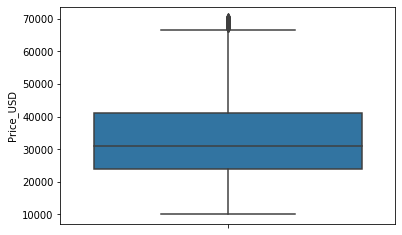

In [208]:
clean_data=remove_outlier(clean_data, "Price_USD")
sns.boxplot(y=clean_data.Price_USD)

2155.238704983 - 1491.8494501145 =  663.3892548684998 (Interquantile Range)
lower_Whisker=496.7655678117503  
 upper_Whisker= 3150.3225872857497


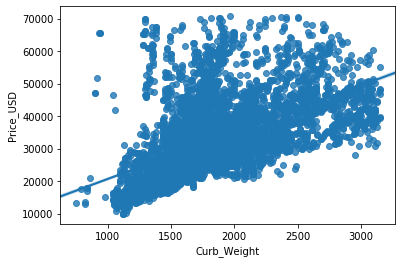

In [209]:
clean_data = remove_outlier(clean_data,"Curb_Weight")
sns.regplot(x="Curb_Weight", y="Price_USD", data=clean_data)

39800.89 - 23499.089 =  16301.801 (Interquantile Range)
lower_Whisker=-953.6124999999993  
 upper_Whisker= 64253.591499999995


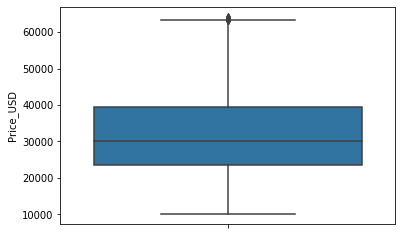

In [210]:
clean_data = remove_outlier(clean_data,"Price_USD")
sns.boxplot(y=clean_data.Price_USD)

In [211]:
clean_data.describe()

,vehicle_id,Curb_Weight,Price_USD,year
count,5463.000000,5463.000000,5463.000000,5463.000000
mean,10077.480322,1835.374098,32199.442074,2010.647813
std,6558.537928,476.221233,11331.375551,0.798936
min,2.000000,749.000000,9970.000000,2010.000000
25%,3070.500000,1487.000000,23497.386750,2010.000000
50%,11217.000000,1734.786333,30107.796210,2010.000000
75%,15556.500000,2095.995810,39410.519570,2011.000000
max,20083.000000,3150.000000,64230.000000,2012.000000


Mean of Curb_Wt. 1835.3740975765159
Mean Of Price_USD 32199.442074345585


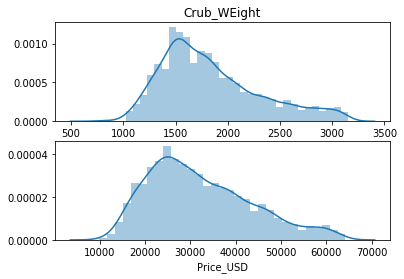

In [371]:
plt.subplot(2,1,1)
plt.xlabel("Curb_weight")
plt.title("Crub_WEight")
sns.distplot(clean_data["Curb_Weight"])
print("Mean of Curb_Wt.",clean_data["Curb_Weight"].mean())

plt.subplot(2,1,2)
plt.xlabel("Price_USD")
plt.title(" \n ")
# plt.title("Price")
sns.distplot(clean_data["Price_USD"])

print("Mean Of Price_USD",clean_data.Price_USD.mean())

# Modelling

In [234]:
# train_x = np.asanyarray(train[['ENGINESIZE']])
# train_y = np.asanyarray(train[['CO2EMISSIONS']])
# data=dataset.copy()
from sklearn.model_selection import train_test_split

X = clean_data.iloc[:,[1,3]]
y = clean_data.iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)



# Linear Regression 

In [321]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
# from sklearn.utils import check_arrays

regr = linear_model.LinearRegression()
# regr=LinearRegression
regr.fit (X_train,y_train)
pred=regr.predict(X_test)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
    
       
print("Mse:",mean_squared_error(y_test,pred))
rms = np.sqrt(mean_squared_error(y_test,pred))
print("Rmse:",rms)
print("Mape:",np.mean(np.abs(y_test-pred)/y_test)*100)
print("R-square:",np.round(r2_score(y_test,pred),2))

Coefficients:  [   14.71416848 -1077.44468471]
Intercept:  2171538.1865484947
Mse: 80434462.35339604
Rmse: 8968.52620854709
Mape: 22.46951289661096
R-square: 0.39


# Random Forest Regressor 

In [282]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200,random_state=101)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
print("Mse:",mean_squared_error(y_test,pred))
rms =np.sqrt(mean_squared_error(y_test,pred))
print("Rmse:",rms)
# print("Mape:",mean_absolute_percentage_error(y_test,pred))
print("Mape:",np.mean(np.abs(y_test-pred)/y_test)*100)
print("R-square:",np.round(r2_score(y_test,pred),2))

Mse: 65892552.9405001
Rmse: 8117.4228016347715
Mape: 17.647620136089504
R-square: 0.5


#  XG-Boost Regressor 

In [292]:
import xgboost as Xgb
xgb = Xgb.XGBRegressor(random_state=101,learning_rate=0.3)

xgb.fit(X_train,y_train)
pred = xgb.predict(X_test)
print("Mse:",mean_squared_error(y_test,pred))
rms = np.sqrt(mean_squared_error(y_test,pred))
print("Rmse:",rms)
print("Mape:",np.mean(np.abs(y_test-pred)/y_test)*100)
print("R-square:",np.round(r2_score(y_test,pred),2))
print()

Mse: 62440745.098447084
Rmse: 7901.945652714088
Mape: 17.805854034716113
R-square: 0.53


## Without Splitting the Data

In [334]:
clean_data.head()

,vehicle_id,Curb_Weight,Price_USD,year
0,2,1729.0,33285.00000,2010
1,4,1305.0,24535.71429,2010
2,5,1305.0,26268.75000,2010
3,8,1725.0,35925.00000,2010
4,9,1574.0,26780.00000,2010


In [346]:
clean_data.describe()

,vehicle_id,Curb_Weight,Price_USD,year
count,5463.000000,5463.000000,5463.000000,5463.000000
mean,10077.480322,1835.374098,32199.442074,2010.647813
std,6558.537928,476.221233,11331.375551,0.798936
min,2.000000,749.000000,9970.000000,2010.000000
25%,3070.500000,1487.000000,23497.386750,2010.000000
50%,11217.000000,1734.786333,30107.796210,2010.000000
75%,15556.500000,2095.995810,39410.519570,2011.000000
max,20083.000000,3150.000000,64230.000000,2012.000000


In [301]:
# plt.figure(figsize=(8,8))
# sns.heatmap(clean_data.drop(["vehicle_id"],axis=1).corr(),annot=True)

In [318]:
X=clean_data.iloc[:,[1,3]]
y=clean_data.iloc[:,2]

In [337]:
regr =LinearRegression()
# regr=LinearRegression
regr.fit(X,y)
pred=regr.predict(X)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
    
       
print("Mse:",mean_squared_error(y,pred))
rms = np.sqrt(mean_squared_error(y,pred))
print("Rmse:",rms)
print("Mape:",np.mean(np.abs(y-pred)/y)*100)
print("R-square:",np.round(r2_score(y,pred),2))
print(regr.score(X,y))

Coefficients:  [   14.89130598 -1058.36513368]
Intercept:  2132867.865716252
Mse: 80803143.70286638
Rmse: 8989.056886173676
Mape: 22.227160356173588
R-square: 0.37
0.37057716391010753


In [343]:
rf = RandomForestRegressor(n_estimators=200,random_state=101)
rf.fit(X,y)
pred = rf.predict(X)
print("Mse:",mean_squared_error(y,pred))
rms =np.sqrt(mean_squared_error(y,pred))
print("Rmse:",rms)
# print("Mape:",mean_absolute_percentage_error(y_test,pred))
print("Mape:",np.mean(np.abs(y-pred)/y)*100)
print("R-square:",np.round(r2_score(y,pred),2))
print(rf.score(X,y))

Mse: 21102643.947471097
Rmse: 4593.76141603709
Mape: 9.487729592281779
R-square: 0.84
0.8356191925990463


In [344]:
xgb = Xgb.XGBRegressor(random_state=101,learning_rate=0.3)
xgb = xgb.fit(X,y)
pred = xgb.predict(X)
print("Mse:",mean_squared_error(y,pred))
rms = np.sqrt(mean_squared_error(y,pred))
print("Rmse:",rms)
print("Mape:",np.mean(np.abs(y-pred)/y)*100)
print("R-square:",r2_score(y,pred))
print(xgb.score(X,y))

Mse: 36980769.39533594
Rmse: 6081.181578882179
Mape: 13.746664577419937
R-square: 0.7119352083726793
0.7119352083726793


# TEST DATA

In [372]:
test_data=pd.read_csv(r'C:\Users\Mizgaan\Downloads\Data_Sets\oos_sample(1).csv')

test_data["Curb_Weight"] = (test_data["Curb_Weight"])
test_data["year"] = (test_data["year"])


In [373]:
X = test_data.iloc[:,[1,2]]

In [379]:
#XG Boost Regressor
test_data["Price_USD"] = xgb.predict(X)

test_data.head()

,vehicle_id,Curb_Weight,year,Price_USD
0,20090,1874.0,2013,33304.863281
1,20091,2005.0,2013,35946.945312
2,20092,2599.0,2013,44107.867188
3,20095,2053.0,2013,36862.046875
4,20096,1415.0,2013,23127.917969


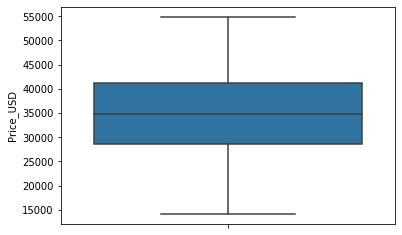

In [380]:
sns.boxplot(y=test_data.Price_USD)

In [381]:
#Random Forest Regressor
test_data["Price_USD"] = rf.predict(X)
test_data.head()

,vehicle_id,Curb_Weight,year,Price_USD
0,20090,1874.0,2013,31496.511875
1,20091,2005.0,2013,41282.820653
2,20092,2599.0,2013,46414.238533
3,20095,2053.0,2013,37789.334350
4,20096,1415.0,2013,22750.832912


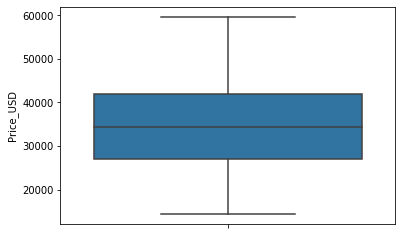

In [382]:
sns.boxplot(y=test_data.Price_USD)

In [376]:
#Linear Regressor
test_data["Price_USD"] = regr.predict(X)
test_data.head()

,vehicle_id,Curb_Weight,year,Price_USD
0,20090,1874.0,2013,30285.159029
1,20091,2005.0,2013,32235.920113
2,20092,2599.0,2013,41081.355867
3,20095,2053.0,2013,32950.702800
4,20096,1415.0,2013,23450.049582


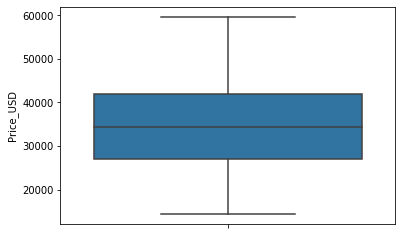

In [384]:
sns.boxplot(y=test_data.Price_USD)

In [394]:
test_data.to_csv("ihs_submission_15.csv",index=False)

In [243]:
# data["Lr"]=regr.coef_*X_train + regr.intercept_


In [248]:
# plt.scatter(dataset["Curb_Weight"], dataset["Price_USD"],  color='blue')
# plt.plot(X, regr.coef_*X + regr.intercept_, '-r')
# plt.xlabel("Engine size")
# plt.ylabel("Emission")